# import libraries

In [1]:
import pandas as pd
import time
import os
import sys
# Define the relative path to the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the parent directory to sys.path
sys.path.append(parent_dir)
import util

print(parent_dir)
# Now you can import the modules
available_tissues = ["brain", "kidney", "bladder","uterus","cervix_ectocervix","fallopian_tube"]
# Choose your tissues from available_tissues (replace with your choices)
tissue1 = "brain"
tissue2 = "kidney"


C:\Users\z004kuwf\Master_thesis\TPM


# get sample id

In [ ]:

util.extract_and_save_gtex_columns("gene_reads_2017-06-05_v8_brain_amygdala.gct.gz", f"{tissue1}_samples.txt")
util.extract_and_save_gtex_columns("gene_reads_2017-06-05_v8_kidney_cortex.gct.gz",f"{tissue2}_samples.txt")

# if a user doesn't have gene proper structured expression data
# read gene/transcript data


In [4]:
transcript_gz_file_path = os.path.join(parent_dir, "GTEx_Analysis_2017-06-05_v8_RSEMv1.3.0_transcript_tpm.gct.gz")

sample_tissue1 = f"{tissue1}_samples.txt"
sample_tissue2 = f"{tissue2}_samples.txt"

output_file_path_tissue1 = f"transcript_{tissue1}.txt"
output_file_path_tissue2 = f"transcript_{tissue2}.txt"

# Read and processtranscript data
util.read_transcript(transcript_gz_file_path, sample_tissue1, output_file_path_tissue1)
util.read_transcript(transcript_gz_file_path, sample_tissue2, output_file_path_tissue2)
gene_gz_file_path = os.path.join(parent_dir, "GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz")

output_file_path_tissue1 = f"gene_{tissue1}.txt"
output_file_path_tissue2 = f"gene_{tissue2}.txt"

# Read and process gene data
util.read_gene(gene_gz_file_path, sample_tissue1, output_file_path_tissue1)
util.read_gene(gene_gz_file_path, sample_tissue2, output_file_path_tissue2)

# protein-coding /low expression filtering on transciprt/gene data

In [2]:
# Genes or transcripts were removed if they had zero read counts in more than 1/70 of the total number of samples 
start_time =time.time()
# Perform tissue analysis
util.preprocessing_data(tissue1, available_tissues,1/70,-1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 531.4910604953766 seconds


In [3]:
# Genes or transcripts were removed if they had zero read counts in more than 1/70 of the total number of samples 
start_time =time.time()
# Perform tissue analysis
util.preprocessing_data(tissue2, available_tissues,1/70,-1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 84.0978946685791 seconds


# GRNboost

In [3]:
start_time = time.time()
util.run_grnboost(tissue1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 58959 instead
  warnings.warn(
C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\client.py:3163: UserWarning: Sending large graph of size 67.06 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Execution Time: 11327.114843845367 seconds


In [2]:

start_time = time.time()
util.run_grnboost(tissue2)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54331 instead
  warnings.warn(
C:\Users\z004kuwf\Anaconda3\lib\site-packages\distributed\client.py:3163: UserWarning: Sending large graph of size 17.91 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Execution Time: 656.0872023105621 seconds


# Construcing a GRN (gene+isoform)

In [9]:
start_time = time.time()
network_tissue1=util.grn_mapping(tissue1)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 530.0260775089264 seconds


In [3]:
start_time = time.time()
network_tissue2=util.grn_mapping(tissue2)
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")

Execution Time: 39.24023246765137 seconds


# differential expression analysis

## creating meta data

In [2]:
util.meta_data(tissue1,tissue2)

## two tissues combined gene expression data

In [6]:
combined_expression_df = util.gene_expression_sum(tissue1, tissue2)
print(combined_expression_df)

                 GTEX-144GL-0011-R4a-SM-5PNUI  GTEX-15DDE-0011-R4b-SM-7KULI  \
Gene_ID                                                                       
ENSG00000000003                        2.3150                        3.1850   
ENSG00000000419                        9.4600                       11.3800   
ENSG00000000457                        1.0880                        0.7208   
ENSG00000000460                        0.3448                        0.3357   
ENSG00000000938                        2.3780                        3.0340   
...                                       ...                           ...   
ENST00000615368                        0.0000                        0.0000   
ENST00000617670                        0.0000                        0.0000   
ENST00000618908                        0.0000                        0.0000   
ENST00000624811                        0.0000                        0.0000   
ENST00000635935                        0.0000       

## run differential_expression.R

# aggregation data with differential gene analysis results

In [4]:
tissue1_df = pd.read_csv(f'{tissue1}_df.csv')
tissue2_df = pd.read_csv(f'{tissue2}_df.csv')
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'
df=pd.read_csv(diff_expression_df)
downregulated_df = df[df['regulation_status'] == 'Downregulated']
print(downregulated_df)
Upregulated_df = df[df['regulation_status'] == 'Upregulated']
print(Upregulated_df)

            Unnamed: 0   baseMean  log2FoldChange     lfcSE       stat  \
0      ENSG00000001461  14.983322       -2.232645  0.093574 -23.859654   
5      ENSG00000003249  17.545118       -2.006817  0.098066 -20.463885   
7      ENSG00000003987   2.609686       -3.145130  0.206283 -15.246695   
9      ENSG00000004468   2.084571       -2.136797  0.194185 -11.003908   
10     ENSG00000004660  15.327407       -3.112058  0.131028 -23.751128   
...                ...        ...             ...       ...        ...   
27759  ENST00000640815   8.645057       -6.382928  0.252186 -25.310401   
27760  ENST00000640851   1.388179       -3.703814  0.238198 -15.549292   
27761  ENST00000640868   1.450510       -3.745079  0.238549 -15.699439   
27762  ENST00000640961   0.804500       -2.916447  0.248549 -11.733914   
27763  ENST00000640965   3.265551       -4.940290  0.228820 -21.590260   

              pvalue           padj regulation_status  
0      8.040248e-126  4.147409e-125     Downregulated  

In [3]:
tissue1_df = pd.read_csv(f'{tissue1}_df.csv')
tissue2_df = pd.read_csv(f'{tissue2}_df.csv')
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'

start_time = time.time()

# common TFs based merge
TF_df=util.aggregation("TF_gene", tissue1, tissue2, tissue1_df, tissue2_df, diff_expression_df)
print(TF_df)

# common targets based merge
target_df=util.aggregation("target_gene",tissue1, tissue2, tissue1_df, tissue2_df,diff_expression_df)
print(target_df)

# Concat dataframes
combined_table = pd.concat([TF_df, target_df], ignore_index=True)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


           TF_gene tissue_brain TF_transcript_id_brain target_gene_brain  \
0  ENSG00000013561        brain        ENST00000394514   ENSG00000123106   
1  ENSG00000018408        brain        ENST00000360632   ENSG00000170889   
2  ENSG00000001167        brain        ENST00000341376   ENSG00000224470   
3  ENSG00000010818        brain        ENST00000367603   ENSG00000070669   
4  ENSG00000006194        brain        ENST00000219069   ENSG00000104969   
5  ENSG00000008441        brain        ENST00000360105   ENSG00000008441   
6  ENSG00000006704        brain        ENST00000476977   ENSG00000156873   

  target_transcript_id_brain  importance_brain tissue_kidney  \
0            ENST00000381259          6.842457        kidney   
1            ENST00000302907          5.392412        kidney   
2            ENST00000427980          4.846824        kidney   
3            ENST00000394308          4.580147        kidney   
4                          0          4.539093        kidney   
5      

# Tissue specific isoform % 

In [11]:
start_time = time.time()

util.isoform_gene_expression_data("brain_filtered_tr.txt", "brain_samples.txt",tissue1)
util.isoform_gene_expression_data("kidney_filtered_tr.txt", "kidney_samples.txt",tissue2)
grouped_table=util.isoform(tissue1, tissue2, f'{tissue1}_expression.csv', f'{tissue2}_expression.csv')
isoform_table=util.merge_grn_with_percentages(combined_table,grouped_table, tissue1, tissue2)
iso=util.map_names(isoform_table, "gene_mapping.csv", "transcript_mapping.csv", tissue1, tissue2)
print(iso)

end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


     TF_gene tissue_brain TF_transcript_id_brain target_gene_brain  \
0      RNF14        brain              RNF14-203            CCDC91   
1      WWTR1        brain              WWTR1-201              RPS9   
2       NFYA        brain               NFYA-201            ATXN1L   
3     HIVEP2        brain             HIVEP2-202              ASNS   
4     ZNF263        brain             ZNF263-201              SGTA   
..       ...          ...                    ...               ...   
478    NACC2        brain                      0             NACC2   
479     SDSL        brain                      0             HMGB2   
480  ST3GAL3        brain                      0              PIN1   
481   SLC8A1        brain             SLC8A1-207             MYT1L   
482    CRTC3        brain                      0              RYBP   

    target_transcript_id_brain  importance_brain  brain_percentage  \
0                   CCDC91-201          6.842457          0.649746   
1                  

# Gene set enrichment analysis prerank

2024-07-01 04:23:48,989 [INFO] Input gene rankings contains duplicated IDs
2024-07-01 04:23:49,046 [WARNING] Duplicated values found in preranked stats: 17.89% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-01 04:23:49,047 [INFO] Parsing data files for GSEA.............................
2024-07-01 04:23:49,049 [INFO] Enrichr library gene sets already downloaded in: C:\Users\z004kuwf\.cache/gseapy, use local file
2024-07-01 04:23:49,265 [INFO] 5072 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-01 04:23:49,266 [INFO] 0335 gene_sets used for further statistical testing.....
2024-07-01 04:23:49,266 [INFO] Start to run GSEA...Might take a while..................
2024-07-01 04:23:50,599 [INFO] Congratulations. GSEApy runs successfully................



      Name                                               Term        ES  \
0  prerank             Fatty Acid Beta-Oxidation (GO:0006635)  0.899338   
1  prerank        Chemical Synaptic Transmission (GO:0007268) -0.550426   
2  prerank  Anterograde Trans-Synaptic Signaling (GO:0098916) -0.591815   
3  prerank           Regulation Of Cell Adhesion (GO:0030155)  0.666225   
4  prerank                   Metal Ion Transport (GO:0030001) -0.577057   
5  prerank                 Generation Of Neurons (GO:0048699) -0.538426   
6  prerank  Potassium Ion Transmembrane Transport (GO:0071... -0.555565   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0  2.335405       0.0  0.026929      0.018    5/5  10.66%   
1 -1.930345  0.001018  0.106483        0.1  23/31  33.29%   
2 -1.900365       0.0  0.080313      0.134  13/20  20.53%   
3  1.760883  0.018382  0.831247      0.604    5/5  33.82%   
4 -1.744605  0.004449  0.399762      0.614   7/15  13.03%   
5 -1.727305  0.009783  0.360733  

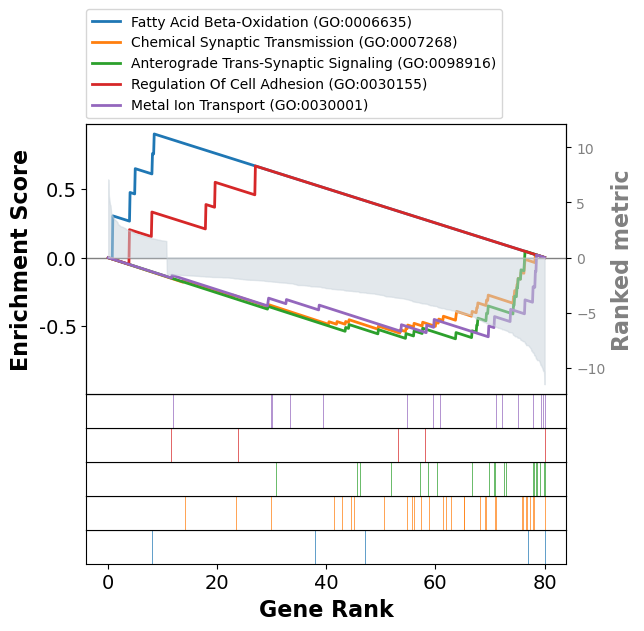

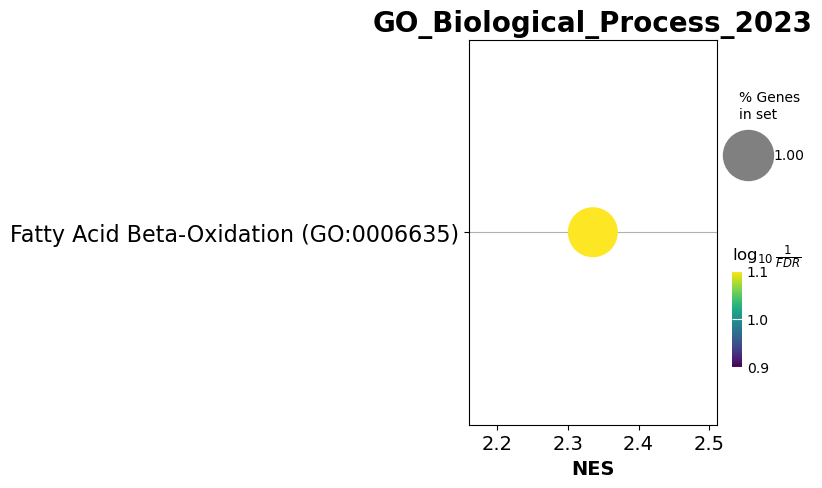

In [2]:
diff_expression_df=f'../differential_expression_analysis/{tissue1}_{tissue2}_significant_results.csv'

util.run_gsea(tissue1,diff_expression_df)

2024-07-01 04:24:51,186 [INFO] Input gene rankings contains duplicated IDs
2024-07-01 04:24:51,221 [WARNING] Duplicated values found in preranked stats: 6.72% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-01 04:24:51,224 [INFO] Parsing data files for GSEA.............................
2024-07-01 04:24:51,232 [INFO] Enrichr library gene sets already downloaded in: C:\Users\z004kuwf\.cache/gseapy, use local file


      Name                                               Term        ES  \
0  prerank        Chemical Synaptic Transmission (GO:0007268) -0.684431   
1  prerank       Neuron Projection Morphogenesis (GO:0048812) -0.772096   
2  prerank                          Axonogenesis (GO:0007409) -0.694042   
3  prerank  Anterograde Trans-Synaptic Signaling (GO:0098916) -0.677052   
4  prerank         Neuron Projection Development (GO:0031175) -0.643878   
5  prerank            Nervous System Development (GO:0007399) -0.470062   
6  prerank           Nitrogen Compound Transport (GO:0071705)  0.618577   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0 -2.392847       0.0  0.001474      0.002  10/13  21.19%   
1 -2.308216       0.0  0.001474      0.004    7/8  19.10%   
2 -2.240291       0.0  0.003932      0.016   8/11  19.10%   
3 -2.090957       0.0   0.01714      0.074    6/9  16.12%   
4 -2.038116       0.0  0.024328       0.12   6/10  10.15%   
5 -1.996829       0.0  0.029489  

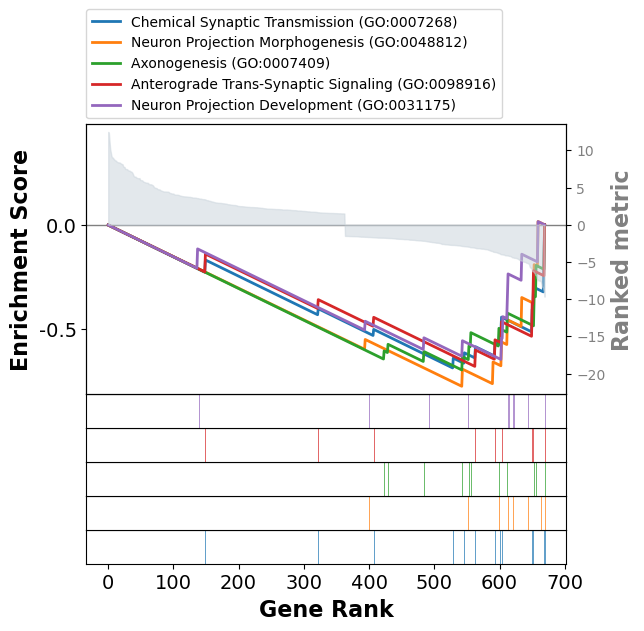

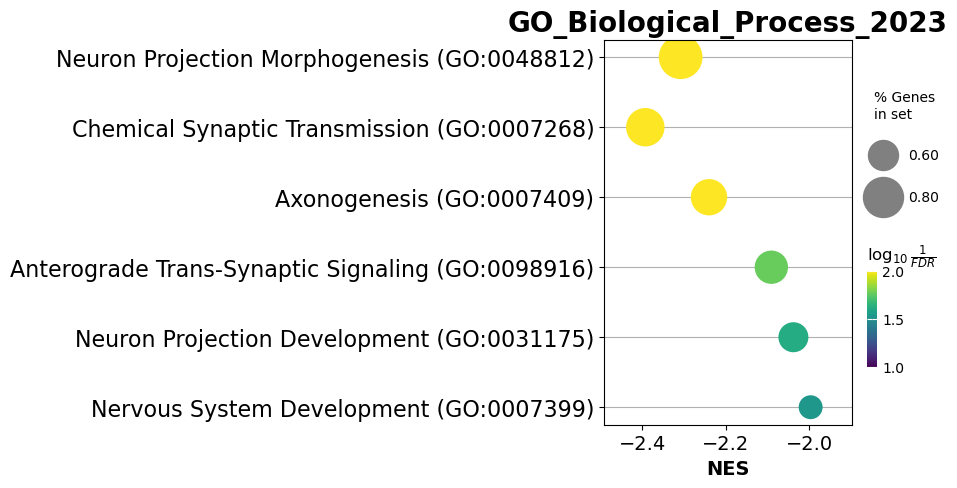

In [3]:
util.run_gsea(tissue2,diff_expression_df)